# Importing required libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Data collection and Analysis

In [70]:
df=pd.read_csv('C:\\Users\\santhosh\\Downloads\\insurance.csv')

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
# number of rows and columns
df.shape

(1338, 7)

In [73]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [74]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

Sex

Smoker

Region

In [75]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data analysis

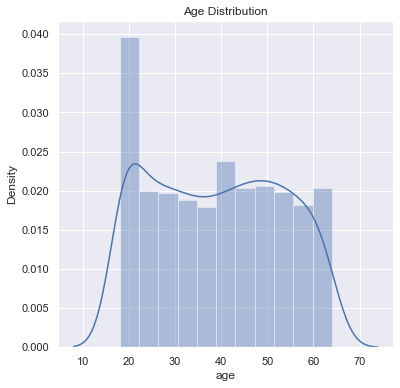

In [76]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

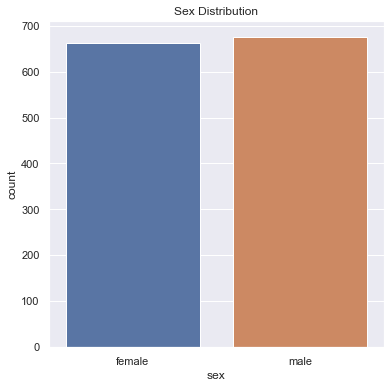

In [77]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

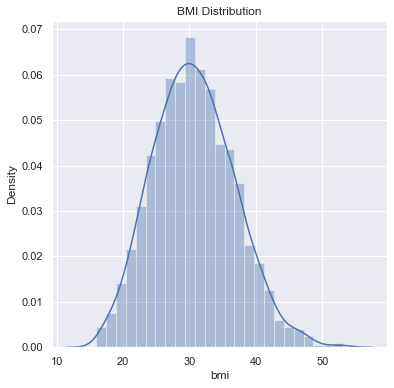

In [78]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

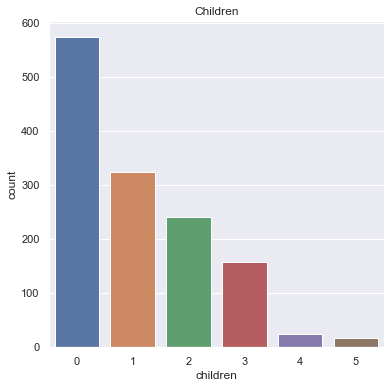

In [79]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [80]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

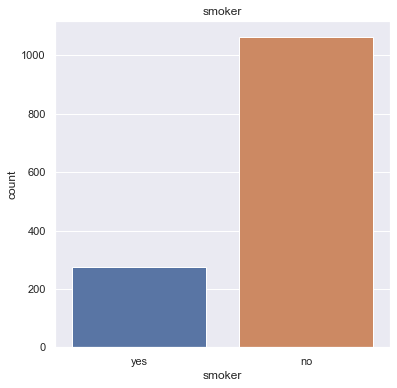

In [81]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

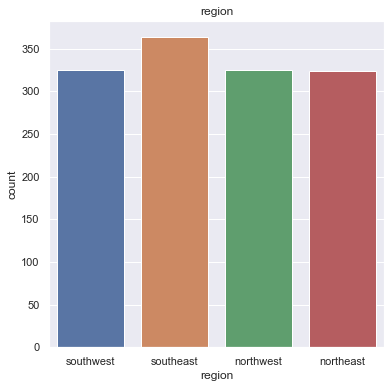

In [82]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [83]:
#sns.countplot(df['region'])
#df = px.data.tips()
fig = px.pie(df, values='charges', names='sex')
fig.show()

In [84]:
fig = px.pie(df, values='bmi', names='smoker')
fig.show()

# EDA insights

 most of the people are around 20 years
    
 most people have no children

 non smokers are more than smokers
    
 Male are paying 53.1% of charges and female are paying 46.9%

 Smoker people have less bmi percentage 

# Data transformation

# one hot encoding

In [85]:
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


# splitting feature and target

In [86]:
X=df.drop('charges',axis=1)

In [87]:
y=df['charges']

# Splitting the data into Training data & Testing Data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

# model building

# linear regression

In [89]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred=linear_reg.predict(X_test)

# Evalution metrics for lr

In [91]:
from sklearn.metrics import mean_absolute_error as MAE
MAE(y_test,y_pred)

4279.860834219364

# knn

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [93]:
y_pred=knn_reg.predict(X_test)

# evaluation for knn

In [94]:
MAE(y_test,y_pred)

7839.679600124626

# svr

In [95]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(X_train,y_train)

SVR()

In [96]:
y_pred=svr_reg.predict(X_test)

# evaluation for svr

In [97]:
MAE(y_test,y_pred)

8470.952011990645

# Decision tree regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor()
decision.fit(X_train,y_train)

DecisionTreeRegressor()

In [99]:
y_pred=decision.predict(X_test)

# Evaluation for dtr

In [100]:
MAE(y_test,y_pred)

3427.8956992873136

# Random forest regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
y_pred=random_forest.predict(X_test)

# Evaluation for random forest

In [103]:
MAE(y_test,y_pred)

2716.1833075933587

# random forest algorithm is doing best